# 3DoF forward kinematics
3自由度マニピュレータの順運動学です。

## Denavit-Hartenberg parameters

|$^{i-1}T_i$|$a_i$|$\alpha_i$|$d_i$|$\theta_i$|
|---|---|---|---|---|
|$^{B}T_1$  |0    |0         |0    |$\theta_1$|
|$^{1}T_2$  |0    |$\pi$/2 |0    |$\theta_2$|
|$^{2}T_3$  |1    |0         |0    |$\theta_3$|
|$^{3}T_E$  |1    |0         |0    |0         |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Homogeneous transformation matrix
# 同次変換行列
def trans_m(a, alpha, d, theta):
    m = np.array([[np.cos(theta), -np.sin(theta), 0, a],
                  [np.cos(alpha)*np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha), -np.sin(alpha)*d],
                  [np.sin(alpha)*np.sin(theta), np.sin(alpha)*np.cos(theta),  np.cos(alpha),  np.cos(alpha)*d],
                  [0, 0, 0, 1]])
    return m

In [3]:
# 関節角の指定
theta = np.array([[np.pi/6],
                  [np.pi/6],
                  [np.pi/2]])

# DHパラメータより同次変換行列を求める
tm0_1 = trans_m(0, 0,       0, theta[0,0])
tm1_2 = trans_m(0, np.pi/2, 0, theta[1,0])
tm2_3 = trans_m(1, 0,       0, theta[2,0])
tm3_4 = trans_m(1, 0,       0, 0)

# 基準座標系から見た各座標系の位置姿勢を計算
r = [tm0_1[0:3,3:4],
     tm0_1.dot(tm1_2)[0:3,3:4],
     tm0_1.dot(tm1_2).dot(tm2_3)[0:3,3:4],
     tm0_1.dot(tm1_2).dot(tm2_3).dot(tm3_4)[0:3,3:4]]

In [4]:
# マニピュレータの描画
def draw(r):
    xs = [e[0,0] for e in r]
    ys = [e[1,0] for e in r]
    zs = [e[2,0] for e in r]
    
    fig = plt.figure(figsize=(10,10))
    
    sp = fig.add_subplot(221,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(xs, ys, "-", color="skyblue", lw=5, label="link")
    plt.plot(xs, ys, "o", color="orange", ms=10, label="joint")
    plt.title("x-y")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.legend(fontsize=10)
    
    sp = fig.add_subplot(222,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(ys, zs, "-", color="skyblue", lw=5, label="link")
    plt.plot(ys, zs, "o", color="orange", ms=10, label="joint")
    plt.title("y-z")
    plt.xlabel("y")
    plt.ylabel("z")
    plt.grid()
    plt.legend(fontsize=10)
    
    sp = fig.add_subplot(223,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(xs, zs, "-", color="skyblue", lw=5, label="link")
    plt.plot(xs, zs, "o", color="orange", ms=10, label="joint")
    plt.title("x-z")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.grid()
    plt.legend(fontsize=10)
    
    ax = fig.add_subplot(224,aspect='equal',projection='3d')
    ax.plot(xs, ys, zs, "-", color="skyblue", lw=5)
    ax.plot(xs, ys, zs, "o", color="orange", ms=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_zlim(-2,2)
    
    plt.tight_layout()
    plt.show()

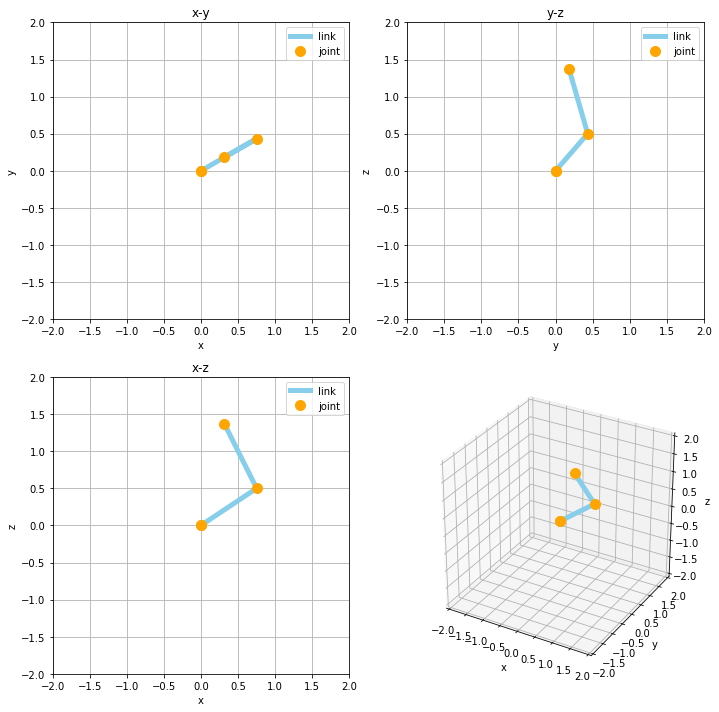

r: [[0.3169873 0.1830127 1.3660254]]


In [5]:
draw(r)
print("r: "+str(r[3].T))